# Assignment 5

## Eren Akgunduz

### Deep Learning &mdash; 18 February 2024

### [Link to notebook](https://colab.research.google.com/drive/1RG9x0C6kfDcCT8ubtGyAds3tDOoSG1LN)


In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Number of images in each training and testing set
print(x_train.shape[0], y_train.shape[0])
print(x_test.shape[0], y_test.shape[0])

60000 60000
10000 10000


In [14]:
# Image width and height
img_ws_hs = {x_train.shape[1], x_train.shape[2], x_test.shape[1], x_test.shape[2]}  # it's the same for all so only one value in set
img_pxs = list(img_ws_hs)[0]
print(img_ws_hs, img_pxs)
print(f"{img_pxs} x {img_pxs}")

{28} 28
28 x 28


In [15]:
# From provided code examples
def img_plt(images, labels):
    "Plots a figure with 10 subplots for each 0-9 digit"
    plt.figure()  # figsize=(15,8)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.imshow(images[i-1,:,:],cmap='gray')
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

In [16]:
# Shuffle the training set indices
num_train = x_train.shape[0]
train_ind = np.arange(0, num_train)
train_ind_shuffled = np.random.permutation(train_ind)

In [18]:
# Just to confirm
train_ind[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
train_ind_shuffled[:10]

array([24551, 33152, 57043, 14668, 24996,  5256,  1884, 39580, 27605,
       31618])

In [20]:
x_train = x_train[train_ind_shuffled,:,:]
y_train = y_train[train_ind_shuffled]

# Select 20% of training data as validation set
x_valid = x_train[0:int(0.2 * num_train), :, :]
y_valid = y_train[0:int(0.2 * num_train)]

# The rest of the training set
x_train = x_train[int(0.2 * num_train):, :, :]
y_train = y_train[int(0.2 * num_train):]

In [29]:
try:
    list({x_train.shape[0], y_train.shape[0]})[1]
except IndexError:
    print("Number of images in training set:", list({x_train.shape[0], y_train.shape[0]})[0])
    print("Number of images in validation set:", list({x_valid.shape[0], y_valid.shape[0]})[0])
    print("Number of images in testing set:", list({x_test.shape[0], y_test.shape[0]})[0])
else:
    print("Oh no, seems like your data is not split properly ;) try again")

Number of images in training set: 48000
Number of images in validation set: 12000
Number of images in testing set: 10000


In [30]:
def plot_all(x_set, y_set, set_name):
    print(f"Selecting 10 images from {set_name} set")
    x_rnd = np.zeros((10, x_set.shape[1], x_set.shape[2]))
    y_rnd = np.arange(10)
    for digit in range(10):
        x_d = x_set[y_set == digit,:,:]
        x_rnd[digit,:,:] = x_d[0, :, :]  # selecting first digit from the set
    img_plt(x_rnd, y_rnd)

Selecting 10 images from training set


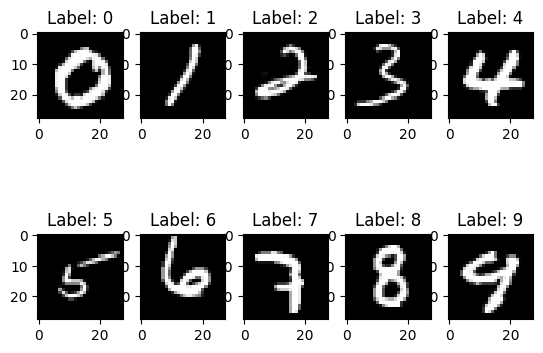

In [31]:
plot_all(x_train, y_train, "training")

Selecting 10 images from validation set


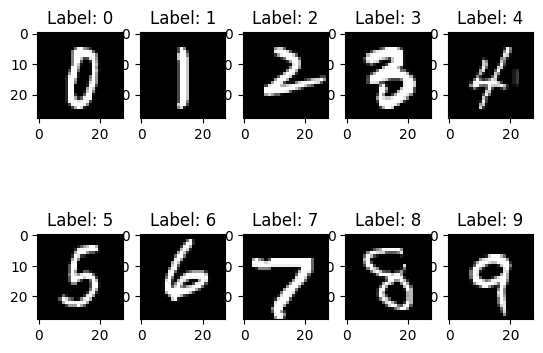

In [32]:
plot_all(x_valid, y_valid, "validation")

Selecting 10 images from testing set


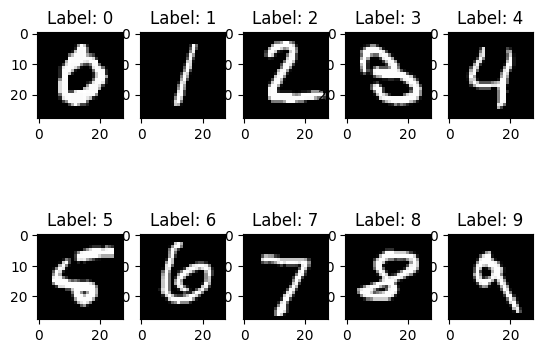

In [33]:
plot_all(x_test, y_test, "testing")

## Problem 2

In [68]:
def feat_plt(feature, labels, digits):
    plt.figure()
    sample_nums = np.arange(feature.shape[0])
    plt.plot(sample_nums[labels==digits[0]], feature[labels==digits[0]], 'gs',
             sample_nums[labels==digits[1]], feature[labels==digits[1]], 'r^')
    plt.legend([f'Digit {digits[0]}', f'Digit {digits[1]}'])
    plt.xlabel('Sample #')
    plt.ylabel('Average of the 3x3 center grid')
    plt.title('Extrated feature from validation data')
    plt.show()

In [69]:
def pred_fun(features, threshold, digits):
    y_pred = np.ones(features.shape) * digits[0]
    y_pred[features > threshold] = digits[1]
    return y_pred

In [70]:
def acc_fun(labels_actual, labels_pred):
    acc = np.sum(labels_actual==labels_pred) / len(labels_actual) * 100
    return acc

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [72]:
x_train_01 = x_train[np.logical_or(y_train==0, y_train==1), :, :]
y_train_01 = y_train[np.logical_or(y_train==0, y_train==1)]
x_test_01 = x_test[np.logical_or(y_test==0, y_test==1), :, :]
y_test_01 = y_test[np.logical_or(y_test==0, y_test==1)]

In [73]:
print(x_train_01.shape, y_train_01.shape)

(12665, 28, 28) (12665,)


In [74]:
print(x_test_01.shape, y_test_01.shape)

(2115, 28, 28) (2115,)


In [75]:
# Shuffle the training set indices
num_train_01 = x_train_01.shape[0]
train01_ind = np.arange(0, num_train_01)
train01_ind_shuffled = np.random.permutation(train01_ind)

x_train_01 = x_train_01[train01_ind_shuffled,:,:]
y_train_01 = y_train_01[train01_ind_shuffled]

# Select 500 images for validation set
x_valid_01 = x_train_01[0:500, :, :]
y_valid_01 = y_train_01[0:500]

# The rest of the training set
x_train_01 = x_train_01[500:, :, :]
y_train_01 = y_train_01[500:]

In [76]:
x_train_01.shape

(12165, 28, 28)

In [77]:
features_train = np.sum(x_train_01[:, 13:16, 13:16], axis=2)

In [78]:
features_train.shape

(12165, 3)

In [79]:
features_train = np.sum(features_train, axis=1) / 9

In [80]:
features_train.shape

(12165,)

In [81]:
features_train

array([  0.        , 162.55555556,   0.        , ...,  18.66666667,
         0.        , 198.11111111])

In [84]:
features_val = np.sum(x_valid_01[:, 13:16, 13:16], axis=2)
features_val = np.sum(features_val, axis=1) / 9

In [85]:
features_test = np.sum(x_test_01[:, 13:16, 13:16], axis=2)
features_test = np.sum(features_test, axis=1) / 9

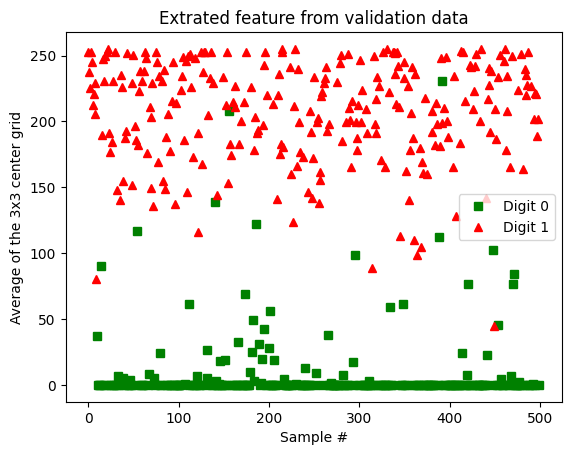

In [86]:
feat_plt(features_val, y_valid_01, [0, 1])

In [88]:
# Time to guess a threshold and calculate the accuracies

y_train_01_pred = np.zeros(features_train.shape)
y_val_01_pred = np.zeros(features_val.shape)
y_test_01_pred = np.zeros(features_test.shape)

threshold = 100

y_train_01_pred[features_train > threshold] = 1
y_train_01_pred[features_train <= threshold] = 0

y_val_01_pred[features_val > threshold] = 1
y_val_01_pred[features_val <= threshold] = 0

y_test_01_pred[features_test > threshold] = 1
y_test_01_pred[features_test <= threshold] = 0

print("Training accuracy:", acc_fun(y_train_01, y_train_01_pred))
print("Validation accuracy:", acc_fun(y_valid_01, y_val_01_pred))
print("Testing accuracy:", acc_fun(y_test_01, y_test_01_pred))

Training accuracy: 98.4052609946568
Validation accuracy: 97.8
Testing accuracy: 99.10165484633569
